In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/cement_data.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


<Axes: >

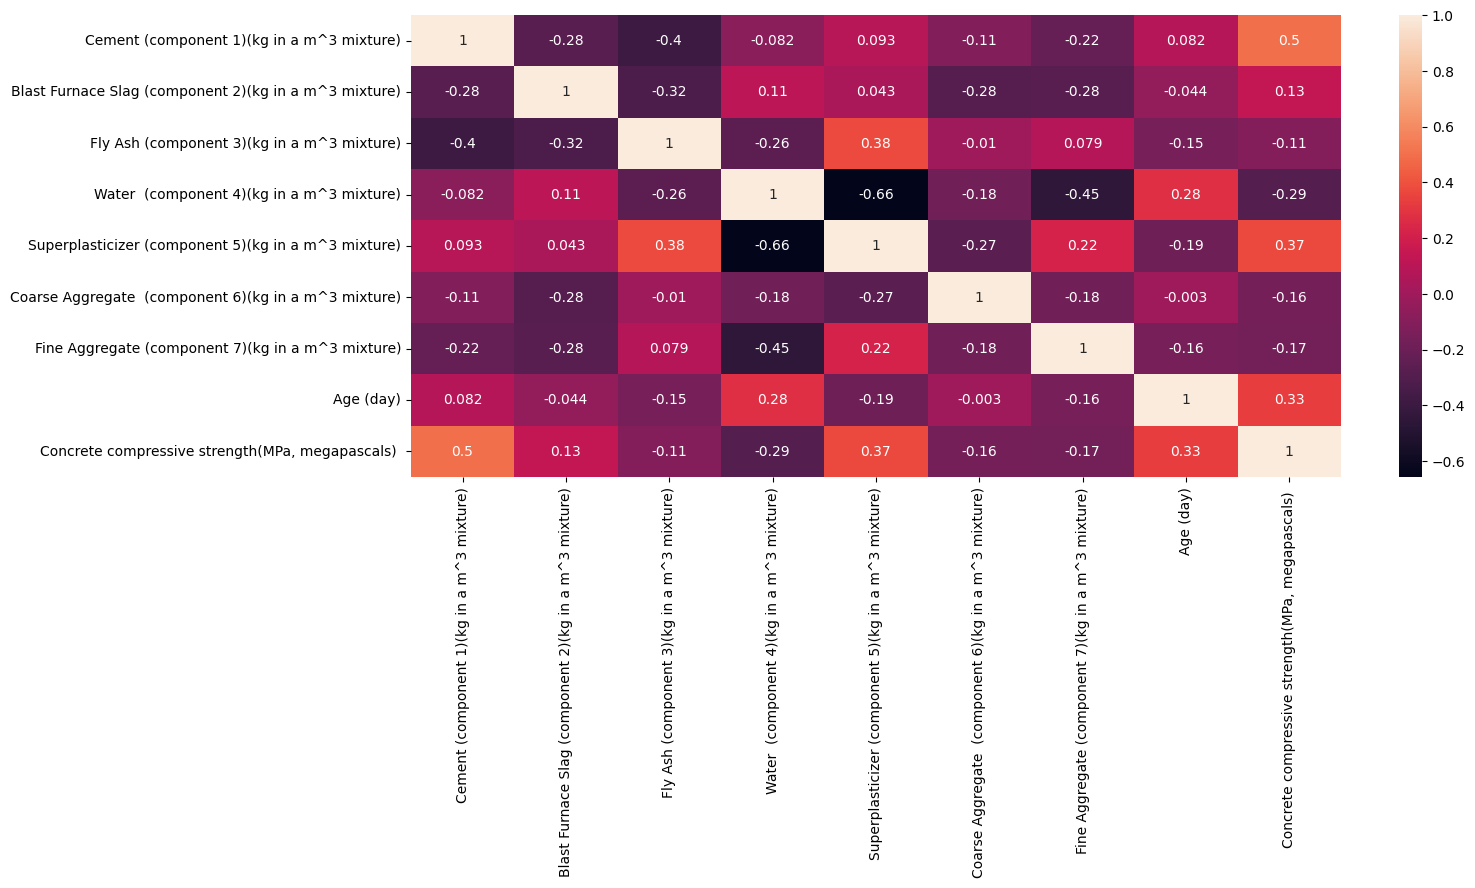

In [4]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Density'>

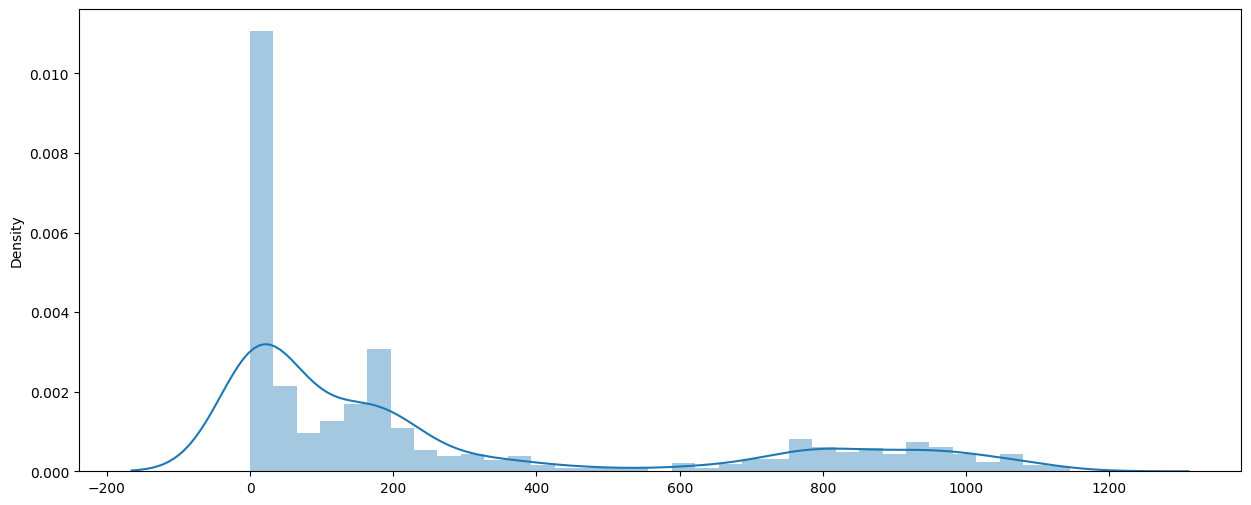

In [5]:
plt.figure(figsize=(15,6))
sns.distplot(df)

<Axes: >

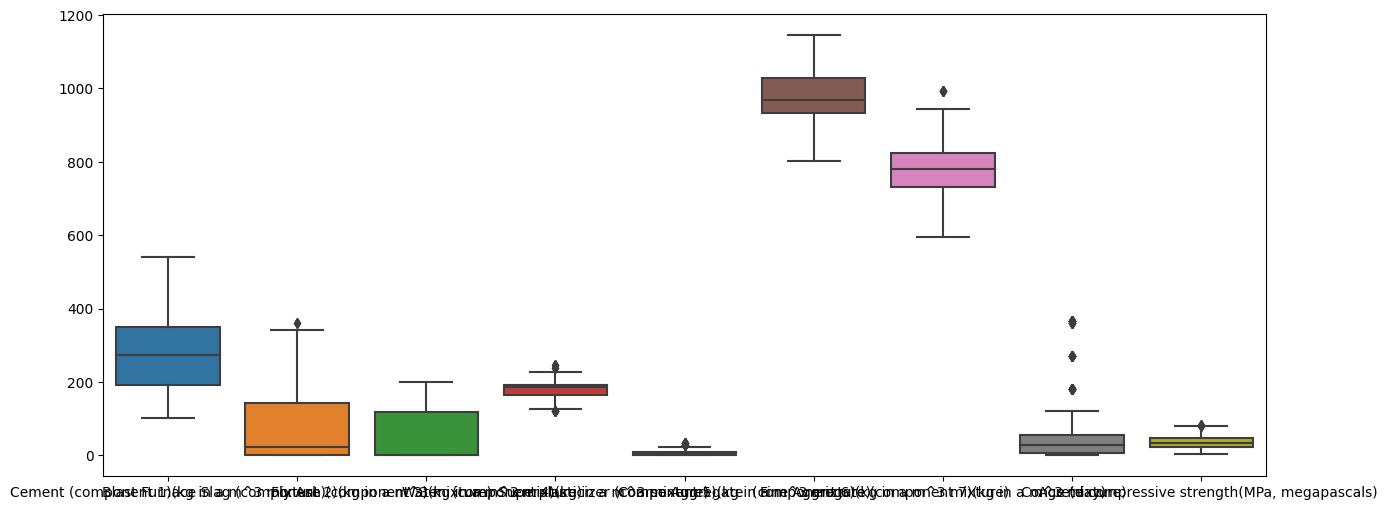

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(df)


In [52]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [53]:
x_train

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
441,250.00,0.0,95.69,191.84,5.33,948.9,857.20,28
420,165.00,128.5,132.10,175.06,8.08,1005.8,746.60,14
819,525.00,0.0,0.00,189.00,0.00,1125.0,613.00,90
642,250.00,0.0,0.00,182.00,0.00,1100.0,820.00,28
538,480.00,0.0,0.00,192.00,0.00,936.2,712.20,7
...,...,...,...,...,...,...,...,...
255,212.52,0.0,100.37,159.32,8.71,1007.8,903.59,14
886,148.00,0.0,137.00,158.00,16.00,1002.0,830.00,28
143,375.00,93.8,0.00,126.60,23.40,852.1,992.60,56
474,446.00,24.0,79.00,162.00,10.30,967.0,712.00,28


In [54]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.ensemble import IsolationForest

In [55]:
preprocess_obj=Pipeline(
                steps=[('impute',SimpleImputer(strategy='mean')),
                      ('scale',StandardScaler()),
                       ('robust',RobustScaler()),
                       
                      ]
            )

In [56]:
x_train=preprocess_obj.fit_transform(x_train)
x_test=preprocess_obj.transform(x_test)

In [57]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,KDTree
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score


In [58]:
models={
            'LinearRegression':LinearRegression(),
            'Lasso':Lasso(),
            'Ridge':Ridge(),
            'Elasticnet':ElasticNet(),
            'DecisionTree':DecisionTreeRegressor(),
            'KNN'  :  KNeighborsRegressor(n_neighbors=10),
            'Random Forest': RandomForestRegressor(),
            'Gradian boost':GradientBoostingRegressor(),
                
}

In [80]:
def evaluate_model(x_train,y_train,x_test,y_test,models):
  
        report = {}
        for i in range(len(models)):
            model = list(models.values())[i]
            # Train model
            model.fit(x_train,y_train)

            

            # Predict Testing data
            y_test_pred =model.predict(x_test)

            # Get R2 scores for train and test data
            #train_model_score = r2_score(ytrain,y_train_pred)
            test_model_score = r2_score(y_test,y_test_pred)

            report[list(models.keys())[i]] =  test_model_score
       
         

        return report

In [82]:
evaluate_model(x_train,y_train,x_test,y_test,models)

{'LinearRegression': 0.6327833041266038,
 'Lasso': 0.5506994915893331,
 'Ridge': 0.6314215452183081,
 'Elasticnet': 0.42495668253005847,
 'DecisionTree': 0.8260125390749103,
 'KNN': 0.7124182714426344,
 'Random Forest': 0.9012579043534469,
 'Gradian boost': 0.9010290250838295}

In [95]:
params={
    
                    'n_estimators': [50,10,20,70,100],
                    'criterion':('gini' 'entropy' 'log_loss'),
                    'max_depth':[1,2,3,4,5,6,7],
                    'max_features':('sqrt' 'log2' ,None),
                    'class_weight':('balanced' 'balanced_subsample')
    
}

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

def hyperparameter_tuning(models, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    y_pred_train = best_model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    
    y_pred_test = best_model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    return best_model,best_score,best_params

In [97]:
hyperparameter_tuning(models, param_grid, X_train, y_train, X_test, y_test)

(RandomForestClassifier(n_estimators=200),
 0.95,
 {'max_depth': None, 'n_estimators': 200})